In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns



## Objective of this Notebook

Understand where churn hurts the business the most and which customer segments
contribute the most to revenue at risk.

WHAT IS CHURN

In business, churn (or churn rate) is the measure of how many customers or subscribers stop doing business with a company over a specific period.  
It is often described as the "leaky bucket" of a business: no matter how many new customers you pour in at the top, if you have high churn, your business will struggle to grow because customers are leaking out the bottom.


Example: If you start the month with 100 subscribers and 5 cancel by the end of the month, your churn rate is 5%.

Types of Churn
Churn isn't always as simple as someone clicking "Cancel." Professionals usually break it down into these categories:
Voluntary Churn: The customer actively chooses to leave (e.g., they found a cheaper competitor or no longer need the service).  

Involuntary Churn: The customer leaves due to technical issues, usually payment failure (e.g., an expired credit card). This is a major focus for SaaS companies because it's often preventable.  

Revenue Churn: Instead of counting people, this counts the dollars lost.  
Example: If a "Big Fish" client leaves, your Customer Churn might only be 1%, but your Revenue Churn could be 20%.

Negative Churn: The "Holy Grail" of business. This happens when the extra money you make from existing customers (via upgrades or add-ons) is greater than the money you lost from people who canceled.  
Why It Matters
Cost of Acquisition: It is almost always significantly cheaper to keep an existing customer than to find a new one.  
Product Health: A sudden spike in churn usually points to a specific problem, like a buggy software update or a price increase that customers didn't like.

Valuation: Investors look at churn to see if a business is sustainable. High churn is often seen as a sign that the product doesn't have "product-market fit."

Is Churn Binary?

Binary churn means that churn is treated as a simple "Yes or No" outcome. It is the most common way to model customer loss because it reduces complex human behavior 

into two distinct categories:  
Churned (1 / True): The customer left or canceled.  
Not Churned (0 / False): The customer stayed or renewed.



What does MonthlyCharges represent?

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

In [2]:
df = pd.read_csv(r"C:\Users\HP\Desktop\telco\data\Telco_Customer_Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# identify numeric and categorical columns 

numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
numeric_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [8]:
categ_cols = df.select_dtypes(include=["object", "category"]). columns
categ_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [9]:
# note we will change totalcharges to float
# Total charges refers to total cost, meaning it should represent numeric values

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [10]:
df = df.dropna(subset=["TotalCharges"])

In [11]:
#Churn Rate by Contract Type
#Business Question
#Which contract types are most likely to churn?

churn_by_contract = (
    df.groupby('Contract')['Churn']
      .apply(lambda x: (x == 'Yes').mean())
      .reset_index(name='Churn_Rate')
)

churn_by_contract


,Contract,Churn_Rate
0,Month-to-month,0.427097
1,One year,0.112772
2,Two year,0.028487


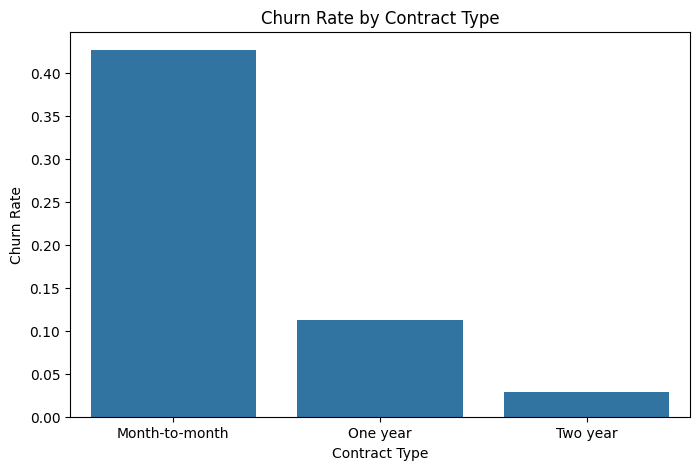

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=churn_by_contract,
    x='Contract',
    y='Churn_Rate'
)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.xlabel("Contract Type")
plt.show()

Churn Rate by Contract Type

Description: This chart shows the percentage of customers who leave (churn) based on their specific contract length.

Observation: Customers on Month-to-month contracts have a churn rate exceeding 40%. This rate drops drastically to approximately 11% for "One year" contracts and roughly 3% for "Two year" contracts.

Business Insight: Commitment length is the strongest predictor of retention. Transitioning a customer from a monthly plan to a yearly plan reduces the likelihood of them leaving by nearly 75%.

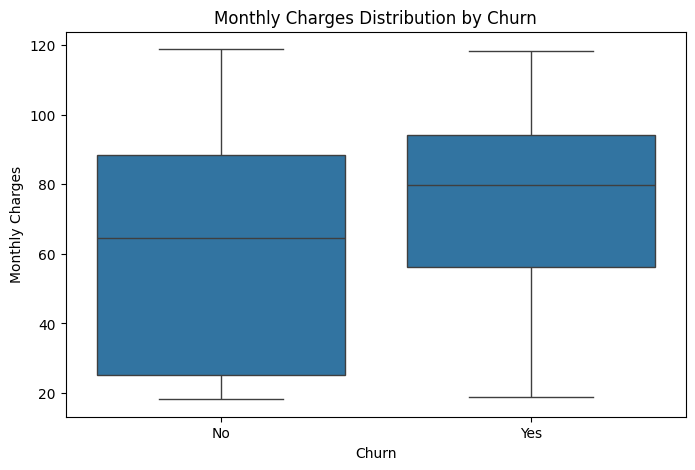

In [13]:
#Monthly Charges vs Churn
#Business Question
#Are higher-paying customers more or less likely to churn?

plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='Churn',
    y='MonthlyCharges'
)
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()



Monthly Charges Distribution by Churn

Description: This compares the monthly bill amounts of customers who stayed ("No") versus those who left ("Yes").

Observation: The median monthly charge for customers who churned is about $80, while the median for those who stayed is much lower, around $65. The "Churn: Yes" box is also more compact and positioned higher on the Y-axis.
Business Insight: High monthly costs are a major driver for leaving.

Customers paying premium prices (above $75–$80) are more sensitive to the value they receive and are the most likely to look for cheaper alternatives.

In [14]:
df.groupby('Churn')['MonthlyCharges'].agg(['mean', 'median'])

,mean,median
Churn,,
No,61.307408,64.45
Yes,74.441332,79.65


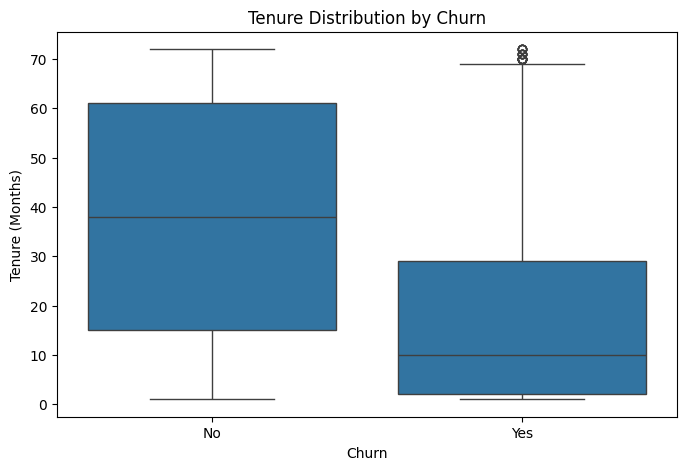

In [15]:
#Business Question
#How does customer tenure relate to churn behavior?

plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='Churn',
    y='tenure'
)
plt.title("Tenure Distribution by Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()

Tenure Distribution by Churn

Description: This visualizes how long (in months) customers had been with the company before either churning or remaining active.
Observation: Customers who churned have a median tenure of only about 10 months. In contrast, customers who stayed have a median tenure of nearly 40 months.

Business Insight: Loyalty builds over time. If a customer survives the first year, their chance of staying long-term increases significantly. The "churners" are largely new customers who likely didn't find immediate value or had a poor onboarding experience.

In [16]:
#Tenure Group View (More Business-Readable)

df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 6, 24, 72],
    labels=['New (0–6)', 'Mid (7–24)', 'Long (25+)']
)

tenure_churn = (
    df.groupby('tenure_group')['Churn']
      .apply(lambda x: (x == 'Yes').mean())
      .reset_index(name='Churn_Rate')
)

tenure_churn

C:\Users\HP\AppData\Local\Temp\ipykernel_14260\354162713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tenure_group'] = pd.cut(
C:\Users\HP\AppData\Local\Temp\ipykernel_14260\354162713.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tenure_group')['Churn']


,tenure_group,Churn_Rate
0,New (0–6),0.533333
1,Mid (7–24),0.316368
2,Long (25+),0.140360


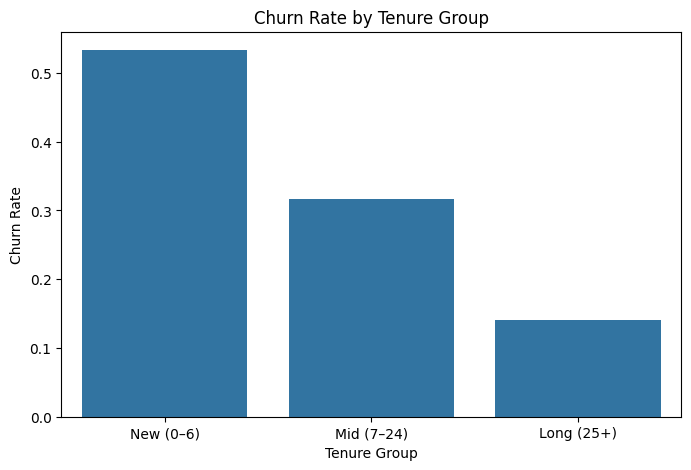

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=tenure_churn,
    x='tenure_group',
    y='Churn_Rate'
)
plt.title("Churn Rate by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Churn Rate")
plt.show()

Tenure Distribution by Churn

Description: This visualizes how long (in months) customers had been with the company before either churning or remaining active.

Observation: Customers who churned have a median tenure of only about 10 months. In contrast, customers who stayed have a median tenure of nearly 40 months.

Business Insight: Loyalty builds over time. If a customer survives the first year, their chance of staying long-term increases significantly. The "churners" are largely new customers who likely didn't find immediate value or had a poor onboarding experience.

In [18]:
#Revenue at Risk by Contract Group (MOST IMPORTANT)
#Business Question
#Which contract group contributes more to revenue at risk?
#Define Contract Groups

df['Contract_Group'] = np.where(
    df['Contract'] == 'Month-to-month',
    'Month-to-month',
    'Long-term'
)

C:\Users\HP\AppData\Local\Temp\ipykernel_14260\3945079997.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Contract_Group'] = np.where(


In [ ]:
#Calculate Revenue at Risk
df['Revenue_at_Risk'] = np.where(
    df['Churn'] == 'Yes',
    df['MonthlyCharges'],
    0
)

C:\Users\HP\AppData\Local\Temp\ipykernel_14260\2217417931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue_at_Risk'] = np.where(


In [ ]:
#Aggregate money metrics by Contract Group

revenue_risk_summary = (
    df.groupby('Contract_Group')
      .agg(
          Customers=('customerID', 'count'),
          Churn_Rate=('Churn', lambda x: (x == 'Yes').mean()),
          Avg_Monthly_Charge=('MonthlyCharges', 'mean'),
          Total_Revenue_At_Risk=('Revenue_at_Risk', 'sum')
      )
      .reset_index()
)

revenue_risk_summary

,Contract_Group,Customers,Churn_Rate,Avg_Monthly_Charge,Total_Revenue_At_Risk
0,Long-term,3157,0.067786,62.833972,18283.75
1,Month-to-month,3875,0.427097,66.398490,120847.10


In [ ]:
#revenue Risk Share Calculation

revenue_risk_summary['Revenue_Risk_Share_%'] = (
    revenue_risk_summary['Total_Revenue_At_Risk'] /
    revenue_risk_summary['Total_Revenue_At_Risk'].sum()
) * 100

revenue_risk_summary

,Contract_Group,Customers,Churn_Rate,Avg_Monthly_Charge,Total_Revenue_At_Risk,Revenue_Risk_Share_%
0,Long-term,3157,0.067786,62.833972,18283.75,13.141406
1,Month-to-month,3875,0.427097,66.398490,120847.10,86.858594


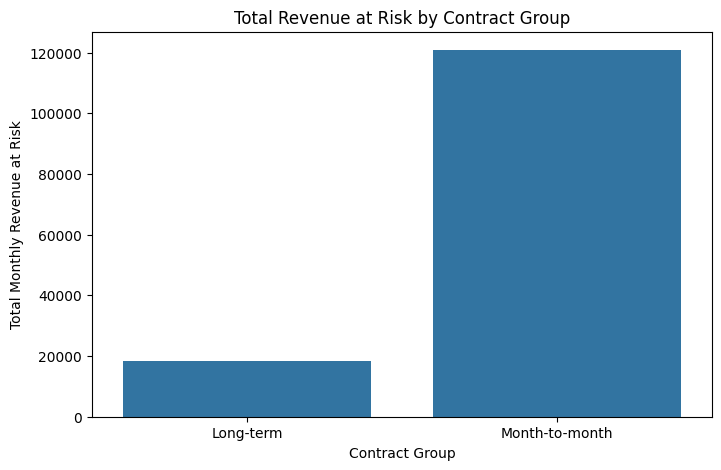

In [ ]:
# plot revenue at risk
plt.figure(figsize=(8,5))
sns.barplot(
    data=revenue_risk_summary,
    x='Contract_Group',
    y='Total_Revenue_At_Risk'
)
plt.title("Total Revenue at Risk by Contract Group")
plt.xlabel("Contract Group")
plt.ylabel("Total Monthly Revenue at Risk")
plt.show()

Total Revenue at Risk by Contract Group

Description: This chart compares the total amount of monthly revenue associated with customers in different contract groups who are at risk of churning.

Observation: The "Month-to-month" group represents over $120,000 in revenue at risk, which is more than six times the revenue at risk from "Long-term" contracts (under $20,000).

Business Insight: The company’s financial stability is heavily dependent on the month-to-to-month segment. Because these customers can leave at any time, this $120k represents a significant, immediate threat to monthly recurring revenue (MRR).